In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 
import subprocess
from multiprocessing import Pool
import warnings
import time
import itertools
from cpymad.madx import Madx
from cpymad import libmadx

from IPython.core.display import display, HTML, Markdown

display(HTML("<style>.rendered_html { font-size: 17px; }</style>"))
def printmd(string):
    display(Markdown(string))
warnings.filterwarnings('ignore')


plt.ion()
%matplotlib inline

In [2]:
madx = Madx(libmadx=libmadx, command_log='log')

In [3]:
cell = 5.3
mqk = 1.0 
mql = 0.1 
length = 5.3
madx.beam(particle='proton', pc=1000)

madx.command.sequence.clone('S1', l='{:10.6e}'.format(length))
madx.elements.marker.clone('s1start', at=0)
madx.command.endsequence()

madx.command.quadrupole.clone('QF', l=mql, k1=mqk)
madx.command.quadrupole.clone('QD', l=mql, k1=-mqk)
madx.command.rbend.clone('dip', l=0.1, angle=10e-3)

madx.command.seqedit(sequence='S1')
# madx.command.install(element='QF1', class_='QF', at='{:10.6e}'.format(mql/2))
# madx.command.install(element='QD1', class_='QD', at='{:10.6e}'.format(length/2-mql/2))
# madx.command.install(element='QD2', class_='QD', at='{:10.6e}'.format(length/2+mql/2))
# madx.command.install(element='QF2', class_='QF', at='{:10.6e}'.format(length-mql/2))
madx.command.endedit()


True

In [4]:
madx.sequence.s1.expanded_elements

[]

In [5]:
madx.sequence.s1.elements

[s1$start, s1start, s1$end]

In [6]:
# madx.command.sequence.clone('S1', l='{:10.6e}'.format(length))
# madx.command.endsequence()

madx.command.seqedit(sequence='S1')
madx.command.install(element='QF1', class_='QF', at='{:10.6e}'.format(mql/2))
madx.command.install(element='B1', class_='dip', at=mql+0.1/2)
madx.command.install(element='QD1', class_='QD', at='{:10.6e}'.format(length/2-mql/2))
madx.command.endedit()


True

In [7]:
madx.use(sequence='s1')
twiss = madx.twiss().dframe()
twiss

name     keyword     s       betx      alfx       mux  \
#s          s1$start:1      marker  0.00  23.044975 -1.112397  0.000000   
s1start      s1start:1      marker  0.00  23.044975 -1.112397  0.000000   
qf1              qf1:1  quadrupole  0.10  23.037259  1.189297  0.000690   
b1                b1:1       rbend  0.20  22.800451  1.178817  0.001384   
drift_0[0]   drift_0:0       drift  2.55  17.838799  0.932524  0.019972   
qd1              qd1:1  quadrupole  2.65  17.831083 -0.855110  0.020865   
drift_1[0]   drift_1:0       drift  5.30  23.044975 -1.112397  0.041731   
#e            s1$end:1      marker  5.30  23.044975 -1.112397  0.041731   

                 bety      alfy       muy    x  ...  sig54     sig55  sig56  \
#s          17.261800  0.819674  0.000000  0.0  ...    0.0  0.000000    0.0   
s1start     17.261800  0.819674  0.000000  0.0  ...    0.0  0.000000    0.0   
qf1         17.270936 -0.911339  0.000923  0.0  ...    0.0  0.000000    0.0   
b1          17.452528 -0.904485  0.001840  0.0  ...    0.0  0.002292    0.0   
drift_0[0]  22.278907 -1.149293  0.020853  0.0  ...    0.0  0.002292    0.0   
qd1         22.286227  1.076336  0.021566  0.0  ...    0.0  0.002292    0.0   
drift_1[0]  17.261800  0.819674  0.043135  0.0  ...    0.0  0.002292    0.0   
#e          17.261800  0.819674  0.043135  0.0  ...    0.0  0.002292    0.0   

            sig61  sig62  sig63  sig64  sig65  sig66   n1  
#s            0.0    0.0    0.0    0.0    0.0    0.0  0.0  
s1start       0.0    0.0    0.0    0.0    0.0    0.0  0.0  
qf1           0.0    0.0    0.0    0.0    0.0    0.0  0.0  
b1            0.0    0.0    0.0    0.0    0.0    0.0  0.0  
drift_0[0]    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
qd1           0.0    0.0    0.0    0.0    0.0    0.0  0.0  
drift_1[0]    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
#e            0.0    0.0    0.0    0.0    0.0    0.0  0.0  

[8 rows x 256 columns]

In [8]:
twiss

name     keyword     s       betx      alfx       mux  \
#s          s1$start:1      marker  0.00  23.044975 -1.112397  0.000000   
s1start      s1start:1      marker  0.00  23.044975 -1.112397  0.000000   
qf1              qf1:1  quadrupole  0.10  23.037259  1.189297  0.000690   
b1                b1:1       rbend  0.20  22.800451  1.178817  0.001384   
drift_0[0]   drift_0:0       drift  2.55  17.838799  0.932524  0.019972   
qd1              qd1:1  quadrupole  2.65  17.831083 -0.855110  0.020865   
drift_1[0]   drift_1:0       drift  5.30  23.044975 -1.112397  0.041731   
#e            s1$end:1      marker  5.30  23.044975 -1.112397  0.041731   

                 bety      alfy       muy    x  ...  sig54     sig55  sig56  \
#s          17.261800  0.819674  0.000000  0.0  ...    0.0  0.000000    0.0   
s1start     17.261800  0.819674  0.000000  0.0  ...    0.0  0.000000    0.0   
qf1         17.270936 -0.911339  0.000923  0.0  ...    0.0  0.000000    0.0   
b1          17.452528 -0.904485  0.001840  0.0  ...    0.0  0.002292    0.0   
drift_0[0]  22.278907 -1.149293  0.020853  0.0  ...    0.0  0.002292    0.0   
qd1         22.286227  1.076336  0.021566  0.0  ...    0.0  0.002292    0.0   
drift_1[0]  17.261800  0.819674  0.043135  0.0  ...    0.0  0.002292    0.0   
#e          17.261800  0.819674  0.043135  0.0  ...    0.0  0.002292    0.0   

            sig61  sig62  sig63  sig64  sig65  sig66   n1  
#s            0.0    0.0    0.0    0.0    0.0    0.0  0.0  
s1start       0.0    0.0    0.0    0.0    0.0    0.0  0.0  
qf1           0.0    0.0    0.0    0.0    0.0    0.0  0.0  
b1            0.0    0.0    0.0    0.0    0.0    0.0  0.0  
drift_0[0]    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
qd1           0.0    0.0    0.0    0.0    0.0    0.0  0.0  
drift_1[0]    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
#e            0.0    0.0    0.0    0.0    0.0    0.0  0.0  

[8 rows x 256 columns]

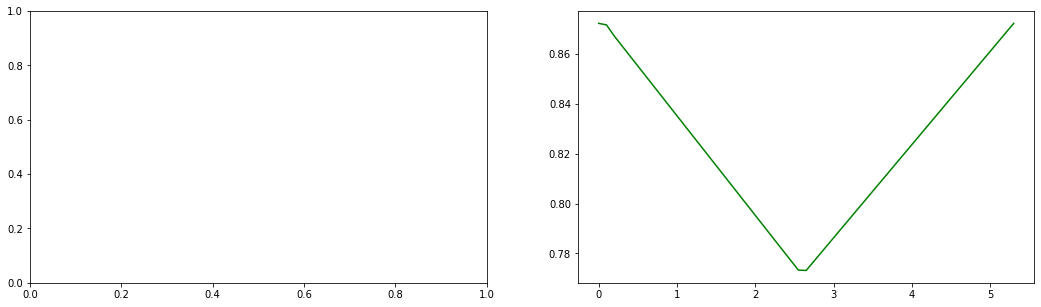

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(18,5))

axs[0].plot(twiss.s, twiss.betx, 'r-')
axs[0].plot(twiss.s, twiss.bety, 'b-')
axs[1].plot(twiss.s, twiss.dx, 'g-')

axs[0].cla()


In [12]:
test = madx.survey()

In [13]:
libmadx.is_started()

True

In [14]:
test.dframe()

name     keyword     s     l  angle         x    y  \
#s          s1$start:1      marker  0.00  0.00   0.00  0.000000  0.0   
s1start      s1start:1      marker  0.00  0.00   0.00  0.000000  0.0   
qf1              qf1:1  quadrupole  0.10  0.10   0.00  0.000000  0.0   
b1                b1:1       rbend  0.20  0.10   0.01 -0.000500  0.0   
drift_0[0]   drift_0:0       drift  2.55  2.35   0.00 -0.024000  0.0   
qd1              qd1:1  quadrupole  2.65  0.10   0.00 -0.025000  0.0   
drift_1[0]   drift_1:0       drift  5.30  2.65   0.00 -0.051499  0.0   
#e            s1$end:1      marker  5.30  0.00   0.00 -0.051499  0.0   

                   z  theta  phi  psi  globaltilt  slot_id  assembly_id  \
#s          0.000000   0.00  0.0  0.0         0.0      0.0          0.0   
s1start     0.000000   0.00  0.0  0.0         0.0      0.0          0.0   
qf1         0.100000   0.00  0.0  0.0         0.0      0.0          0.0   
b1          0.199999  -0.01  0.0  0.0         0.0      0.0          0.0   
drift_0[0]  2.549881  -0.01  0.0  0.0         0.0      0.0          0.0   
qd1         2.649876  -0.01  0.0  0.0         0.0      0.0          0.0   
drift_1[0]  5.299744  -0.01  0.0  0.0         0.0      0.0          0.0   
#e          5.299744  -0.01  0.0  0.0         0.0      0.0          0.0   

            mech_sep  v_pos comments  
#s               0.0    0.0           
s1start          0.0    0.0           
qf1              0.0    0.0           
b1               0.0    0.0           
drift_0[0]       0.0    0.0           
qd1              0.0    0.0           
drift_1[0]       0.0    0.0           
#e               0.0    0.0

In [15]:
test.dframe().loc['b1']

name                  b1:1
keyword              rbend
s                      0.2
l                      0.1
angle                 0.01
x             -0.000499998
y                        0
z                 0.199999
theta                -0.01
phi                      0
psi                      0
globaltilt               0
slot_id                  0
assembly_id              0
mech_sep                 0
v_pos                    0
comments                  
Name: b1, dtype: object